# A tibble: 10,109 × 10
   id    condit bandInt bandIntn bandIntnb    vx   vxn   vxb  vxbn svx[,1]
   <fct> <fct>    <dbl>    <dbl>     <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>
 1 1     Varied    1000    0.333     0.625  682. 0.227   700 0.438  -0.352
 2 1     Varied    1000    0.333     0.625  943. 0.314   950 0.594   0.246
 3 1     Varied     800    0.266     0.5    951. 0.317   950 0.594   0.264
 4 1     Varied    1000    0.333     0.625 1431. 0.477  1450 0.906   1.37 
 5 1     Varied    1200    0.400     0.75  1676. 0.558  1600 1       1.93 
 6 1     Varied    1200    0.400     0.75  1373. 0.457  1350 0.844   1.23 
 7 1     Varied     800    0.266     0.5    641. 0.214   650 0.406  -0.447
 8 1     Varied     800    0.266     0.5   1117. 0.372  1100 0.688   0.646
 9 1     Varied    1200    0.400     0.75  1201. 0.400  1200 0.75    0.838
10 1     Varied    1200    0.400     0.75  1041. 0.347  1050 0.656   0.471
# ℹ 10,099 more rows


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


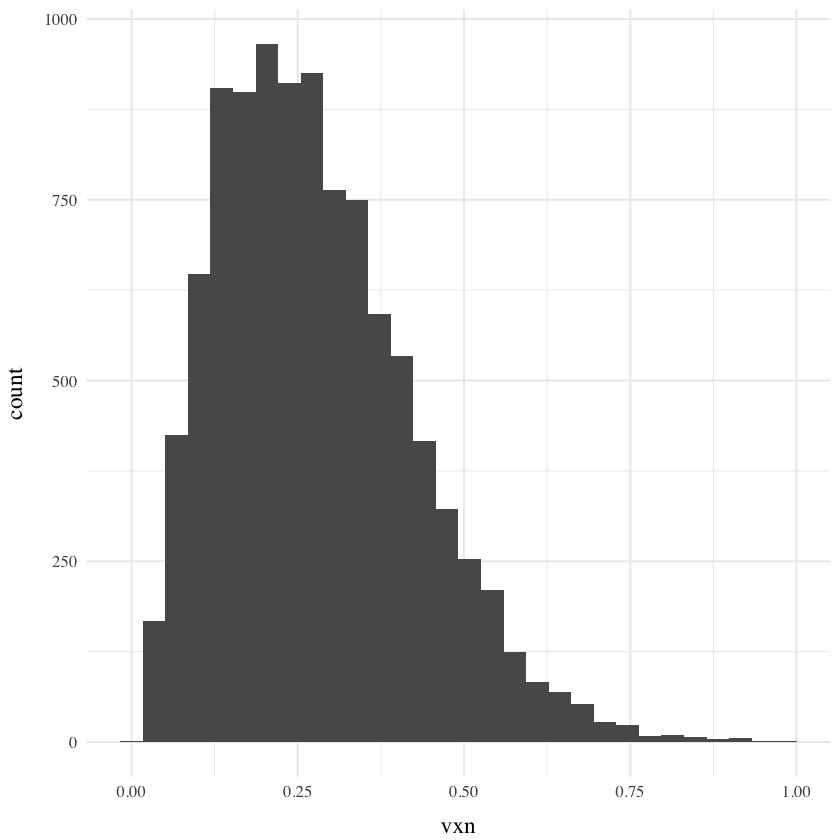

In [5]:
pacman::p_load(tidyverse,tidybayes,brms,broom,broom.mixed,lme4,emmeans,here,knitr,kableExtra,gt,gghalves,patchwork,ggforce,ggdist)
e1 <- readRDS(here("data/e1_07-27-23.rds"))
source(here("Functions/Display_Functions.R"))
source(here("Functions/org_functions.R"))



test <- e1 |> filter(expMode2 == "Test") 
test <- test |>  mutate(id=factor(id,levels=unique(id)),
         vxbn=vxb/max(test$vxb),vxn=vx/max(test$vx),bandIntn=bandInt/max(test$vx),bandIntnb=bandInt/max(test$vxb),svx=scale(vx, scale = TRUE),
         vxC=ifelse(vx>2000,2000,vx))

testAvg <- test %>% group_by(id, condit, vb, bandInt,bandType,tOrder) %>%
  summarise(nHits=sum(dist==0),vxMean=mean(vx),vxMed=median(vx),dist=mean(dist),sdist=mean(sdist),n=n(),Percent_Hit=nHits/n)



select(test,id,condit,bandInt,bandIntn,bandIntnb,vx,vxn,vxb,vxbn,svx) %>% print(n=10)

ggplot(test,aes(x=vxn))+geom_histogram()

test2 <- test %>% filter(expMode=="test-Nf")


stest <- test |> filter(id %in% 1:40)

options(mc.cores = 4, brms.backend = "cmdstanr")

Unrealistic priors

In [1]:
%load_ext jupyter_ai

In [6]:
%load_ext chapyter

In file included from /var/folders/r1/c92xp9t13094kv05vft2mbzw0000gn/T/Rtmp5MA9sS/model-14c0c497bef8.hpp:1:
In file included from /Users/thomasgorman/.cmdstan/cmdstan-2.32.2/stan/src/stan/model/model_header.hpp:4:
In file included from /Users/thomasgorman/.cmdstan/cmdstan-2.32.2/stan/lib/stan_math/stan/math.hpp:19:
In file included from /Users/thomasgorman/.cmdstan/cmdstan-2.32.2/stan/lib/stan_math/stan/math/rev.hpp:10:
In file included from /Users/thomasgorman/.cmdstan/cmdstan-2.32.2/stan/lib/stan_math/stan/math/rev/fun.hpp:198:
In file included from /Users/thomasgorman/.cmdstan/cmdstan-2.32.2/stan/lib/stan_math/stan/math/prim/functor.hpp:15:
In file included from /Users/thomasgorman/.cmdstan/cmdstan-2.32.2/stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6:
In file included from /Users/thomasgorman/.cmdstan/cmdstan-2.32.2/stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9:
In file included from /Users/thomasgorman/.cmdstan/cmdstan-2.32.2/stan/lib/stan_math/lib/b

Running MCMC with 4 parallel chains...



Chain 1 Rejecting initial value:

Chain 1   Log probability evaluates to log(0), i.e. negative infinity.

Chain 1   Stan can't start sampling from this initial value.

Chain 1 Rejecting initial value:

Chain 1   Log probability evaluates to log(0), i.e. negative infinity.

Chain 1   Stan can't start sampling from this initial value.



Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 3 Rejecting initial value:

Chain 3   Log probability evaluates to log(0), i.e. negative infinity.

Chain 3   Stan can't start sampling from this initial value.

Chain 3 Rejecting initial value:

Chain 3   Log probability evaluates to log(0), i.e. negative infinity.

Chain 3   Stan can't start sampling from this initial value.



Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 3 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 4 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 3 Iteration:  

 Family: skew_normal 
  Links: mu = identity; sigma = identity; alpha = identity 
Formula: vxC ~ 1 
   Data: test (Number of observations: 10109) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept   823.28      4.16   815.28   831.58 1.00     2060     2317

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma   431.88      3.28   425.45   438.24 1.00     2178     2618
alpha     4.64      0.20     4.27     5.04 1.00     2738     2787

Draws were sampled using sample(hmc). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

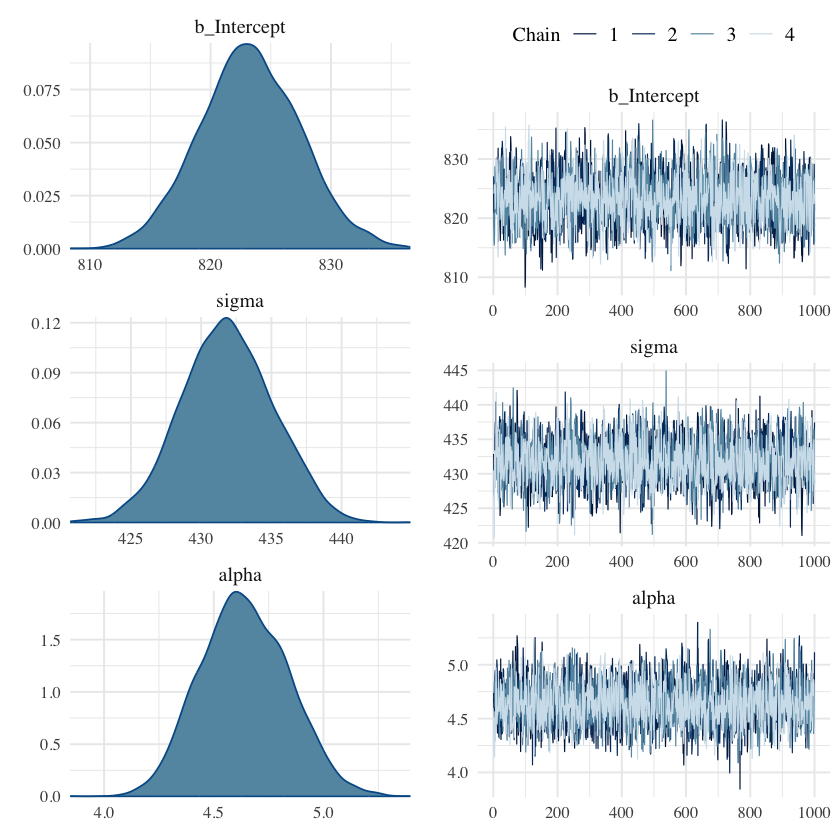

Using all posterior draws for ppc type 'stat' by default.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


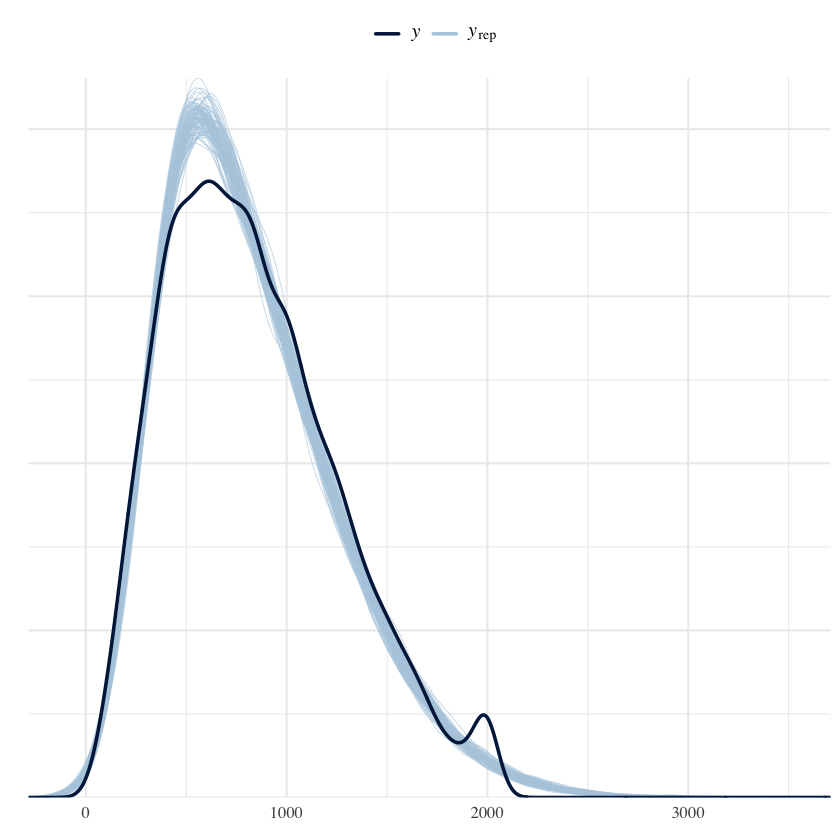

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


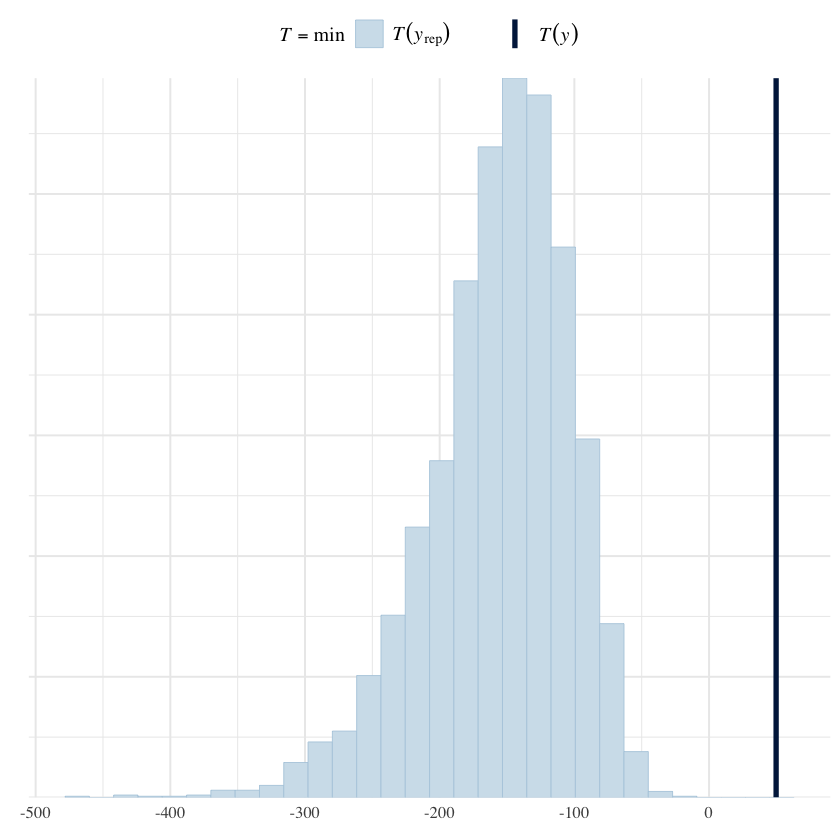

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


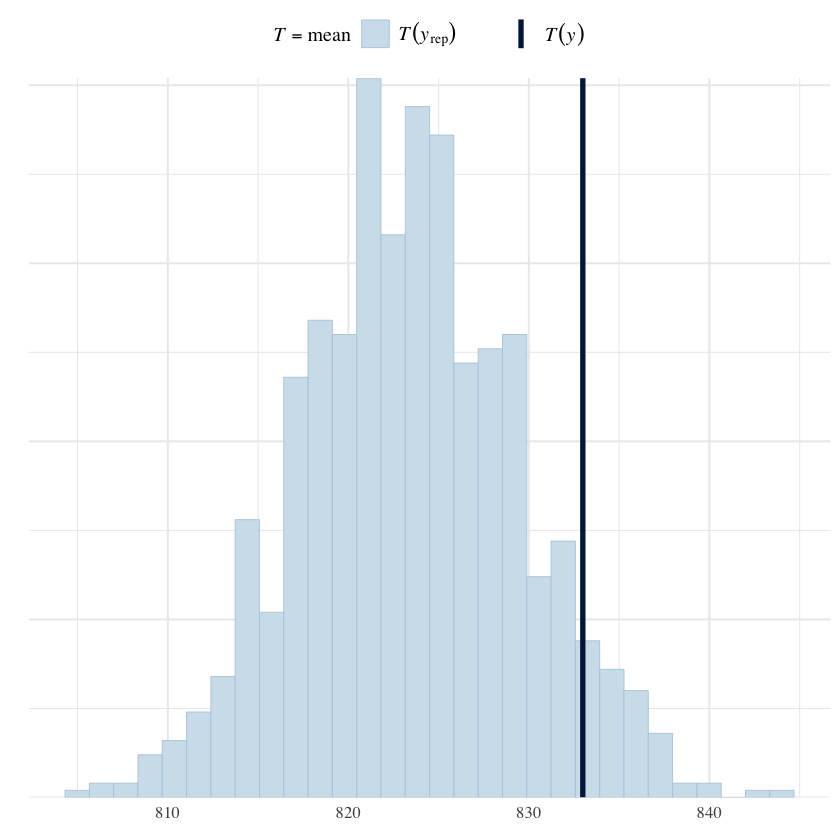

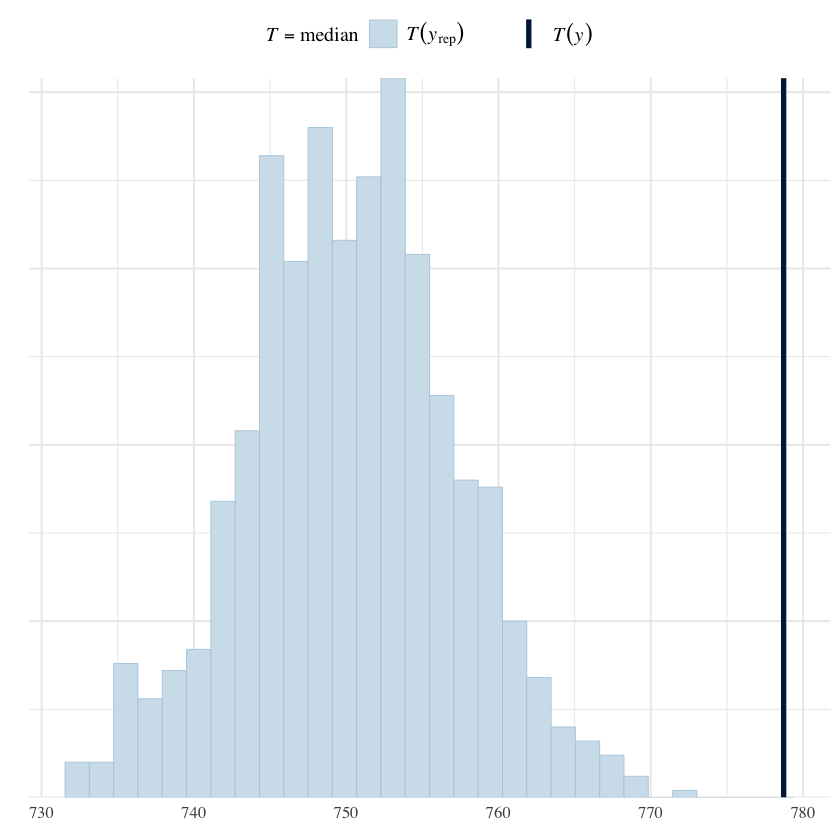

In [6]:
#| eval: false
#| warning: false

fit_int_norm <- brm(vxC ~ 1, # 2.1 sec execution time with 4 cores
  data = test,
  family = skew_normal(),
  #warmup = 100,
  prior = c(
    prior(normal(800, 100), class = Intercept),
    prior(normal(400, 10), class = sigma),
    prior(normal(4,1),class=alpha)
  )
)

fit_int_norm

plot(fit_int_norm)


#pp_check(fit_int_norm, ndraws = 11, type = "hist")

pp_check(fit_int_norm, ndraws = 100, type = "dens_overlay")
pp_check(fit_int_norm, type = "stat", stat = "min")
pp_check(fit_int_norm, ndraws = 1000, type = "stat", stat = "mean")
pp_check(fit_int_norm, ndraws = 1000, type = "stat", stat = "median")


In file included from /var/folders/r1/c92xp9t13094kv05vft2mbzw0000gn/T/RtmpYbT9sT/model-1504136dc6290.hpp:1:
In file included from /Users/thomasgorman/.cmdstan/cmdstan-2.32.2/stan/src/stan/model/model_header.hpp:4:
In file included from /Users/thomasgorman/.cmdstan/cmdstan-2.32.2/stan/lib/stan_math/stan/math.hpp:19:
In file included from /Users/thomasgorman/.cmdstan/cmdstan-2.32.2/stan/lib/stan_math/stan/math/rev.hpp:10:
In file included from /Users/thomasgorman/.cmdstan/cmdstan-2.32.2/stan/lib/stan_math/stan/math/rev/fun.hpp:198:
In file included from /Users/thomasgorman/.cmdstan/cmdstan-2.32.2/stan/lib/stan_math/stan/math/prim/functor.hpp:15:
In file included from /Users/thomasgorman/.cmdstan/cmdstan-2.32.2/stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6:
In file included from /Users/thomasgorman/.cmdstan/cmdstan-2.32.2/stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9:
In file included from /Users/thomasgorman/.cmdstan/cmdstan-2.32.2/stan/lib/stan_math/lib/

Running MCMC with 4 parallel chains...



Chain 1 Rejecting initial value:

Chain 1   Log probability evaluates to log(0), i.e. negative infinity.

Chain 1   Stan can't start sampling from this initial value.

Chain 1 Rejecting initial value:

Chain 1   Log probability evaluates to log(0), i.e. negative infinity.

Chain 1   Stan can't start sampling from this initial value.

Chain 1 Rejecting initial value:

Chain 1   Log probability evaluates to log(0), i.e. negative infinity.

Chain 1   Stan can't start sampling from this initial value.



Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 2 Rejecting initial value:

Chain 2   Log probability evaluates to log(0), i.e. negative infinity.

Chain 2   Stan can't start sampling from this initial value.

Chain 2 Rejecting initial value:

Chain 2   Log probability evaluates to log(0), i.e. negative infinity.

Chain 2   Stan can't start sampling from this initial value.

Chain 2 Rejecting initial value:

Chain 2   Log probability evaluates to log(0), i.e. negative infinity.

Chain 2   Stan can't start sampling from this initial value.

Chain 2 Rejecting initial value:

Chain 2   Log probability evaluates to log(0), i.e. negative infinity.

Chain 2   Stan can't start sampling from this initial value.

Chain 2 Rejecting initial value:

Chain 2   Log probability evaluates to log(0), i.e. negative infinity.

Chain 2   Stan can't start sampling from this initial value.

Chain 2 Rejecting initial value:

Chain 2   Log probability evaluates to log(0), i.e. negative infinity.

Chain 2   Stan can't start sampling from this initial 

Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 3 Rejecting initial value:

Chain 3   Log probability evaluates to log(0), i.e. negative infinity.

Chain 3   Stan can't start sampling from this initial value.

Chain 3 Rejecting initial value:

Chain 3   Log probability evaluates to log(0), i.e. negative infinity.

Chain 3   Stan can't start sampling from this initial value.

Chain 3 Rejecting initial value:

Chain 3   Log probability evaluates to log(0), i.e. negative infinity.

Chain 3   Stan can't start sampling from this initial value.

Chain 3 Rejecting initial value:

Chain 3   Log probability evaluates to log(0), i.e. negative infinity.

Chain 3   Stan can't start sampling from this initial value.

Chain 3 Rejecting initial value:

Chain 3   Log probability evaluates to log(0), i.e. negative infinity.

Chain 3   Stan can't start sampling from this initial value.

Chain 3 Rejecting initial value:

Chain 3   Log probability evaluates to log(0), i.e. negative infinity.

Chain 3   Stan can't start sampling from this initial 

Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 4 Rejecting initial value:

Chain 4   Log probability evaluates to log(0), i.e. negative infinity.

Chain 4   Stan can't start sampling from this initial value.

Chain 4 Rejecting initial value:

Chain 4   Log probability evaluates to log(0), i.e. negative infinity.

Chain 4   Stan can't start sampling from this initial value.

Chain 4 Rejecting initial value:

Chain 4   Log probability evaluates to log(0), i.e. negative infinity.

Chain 4   Stan can't start sampling from this initial value.

Chain 4 Rejecting initial value:

Chain 4   Log probability evaluates to log(0), i.e. negative infinity.

Chain 4   Stan can't start sampling from this initial value.

Chain 4 Rejecting initial value:

Chain 4   Log probability evaluates to log(0), i.e. negative infinity.

Chain 4   Stan can't start sampling from this initial value.

Chain 4 Rejecting initial value:

Chain 4   Log probability evaluates to log(0), i.e. negative infinity.

Chain 4   Stan can't start sampling from this initial 

Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 2 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 2 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 4 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 4 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 4 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  

 Family: skew_normal 
  Links: mu = identity; sigma = identity; alpha = identity 
Formula: vxC ~ 1 + bandInt + (1 + bandInt | id) 
   Data: test (Number of observations: 10109) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~id (Number of levels: 166) 
                       Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)            327.46     18.74   293.27   365.31 1.01      269
sd(bandInt)                0.34      0.02     0.31     0.39 1.01      413
cor(Intercept,bandInt)    -0.80      0.03    -0.85    -0.74 1.01      453
                       Tail_ESS
sd(Intercept)               678
sd(bandInt)                 974
cor(Intercept,bandInt)     1016

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept   528.04     24.74   479.39   574.40 1.01      175      518
bandInt       0.59      0.03     0.53     0.64 1.01      212      539



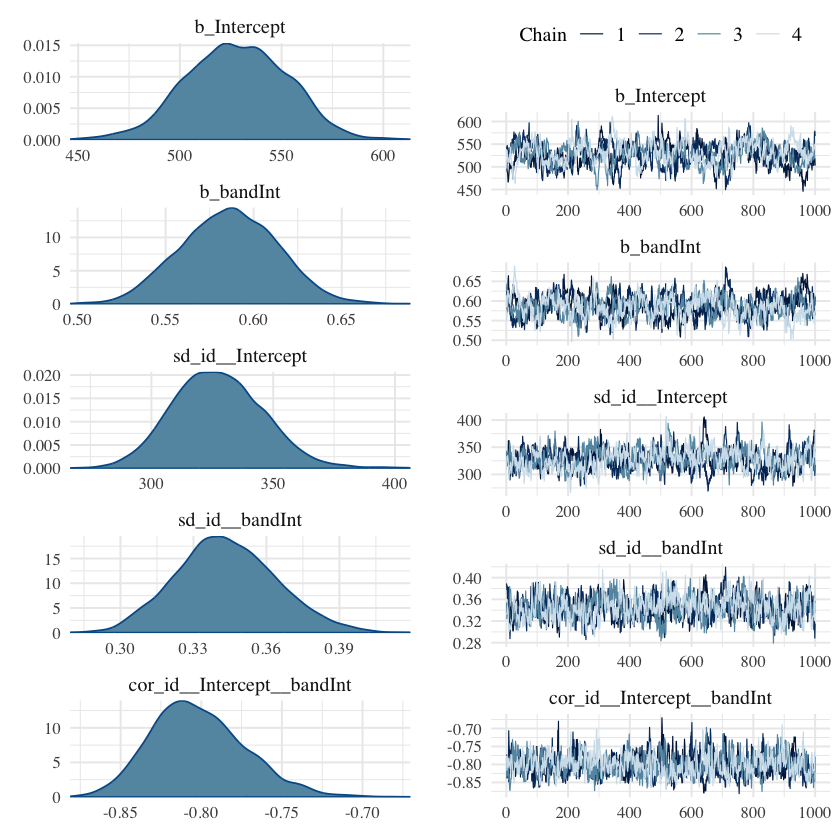

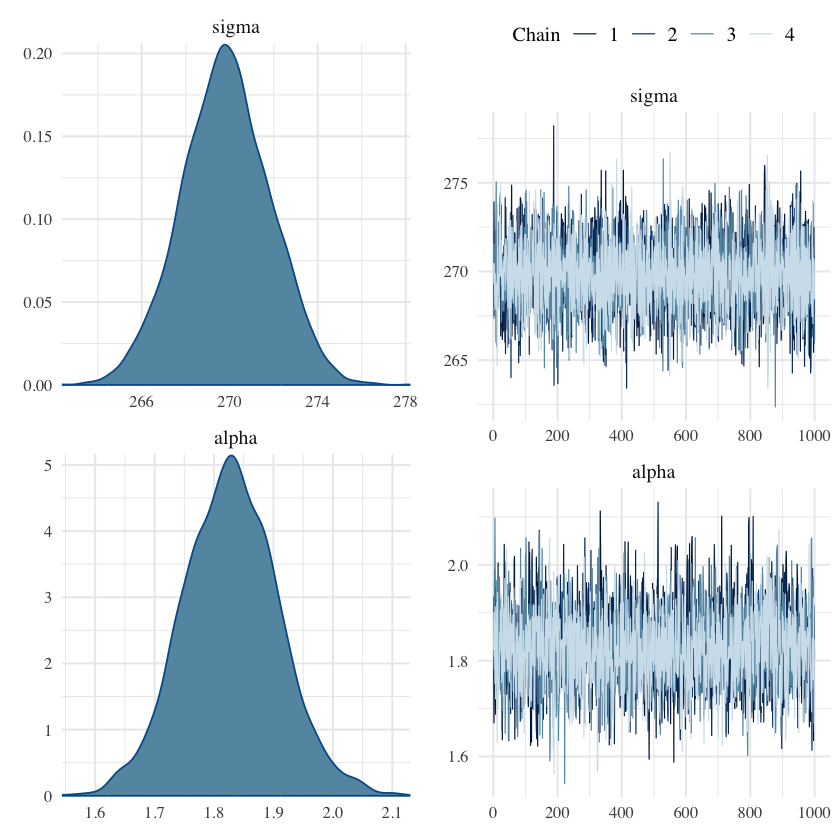

Using all posterior draws for ppc type 'stat' by default.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


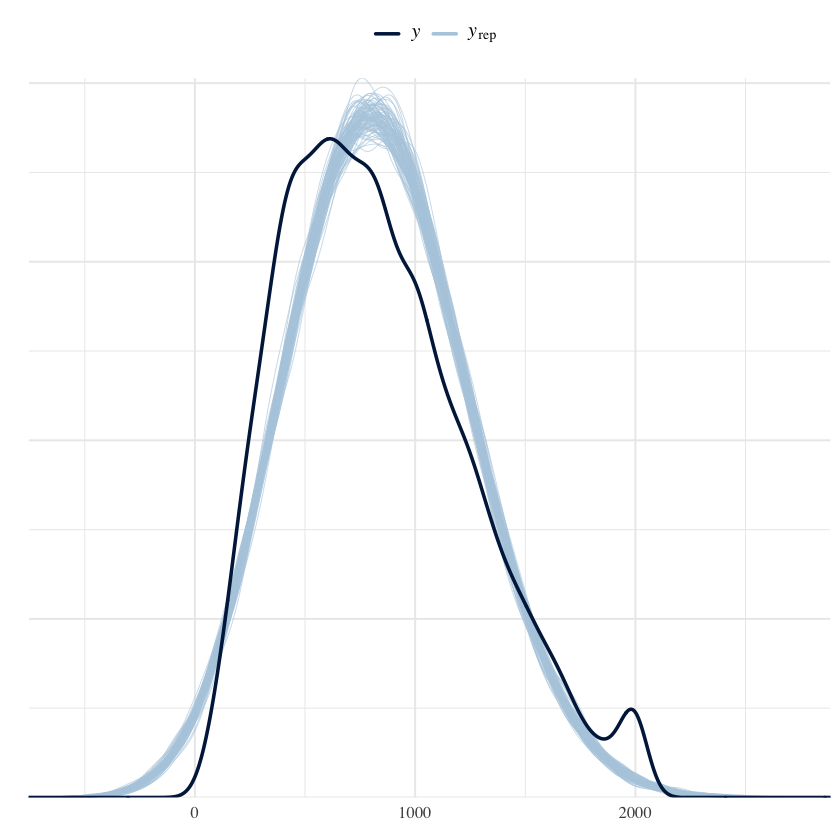

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


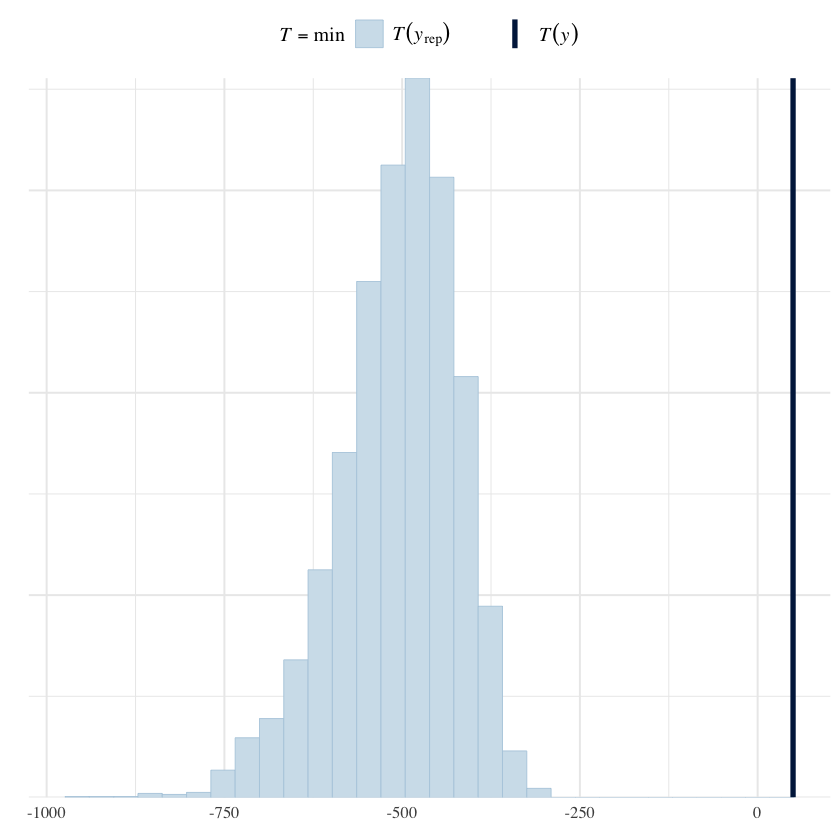

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


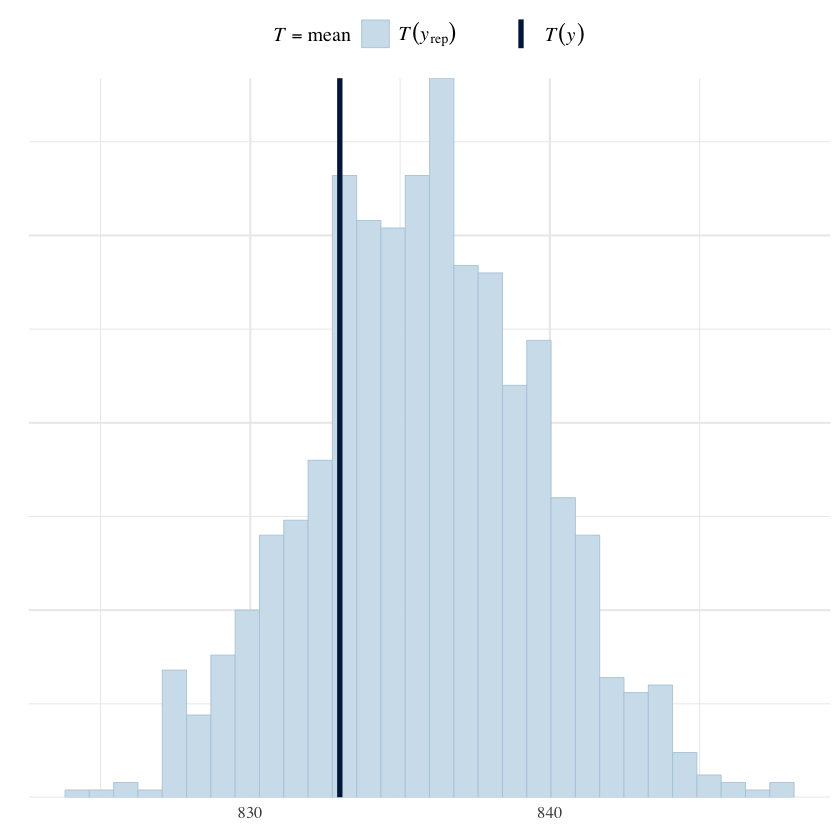

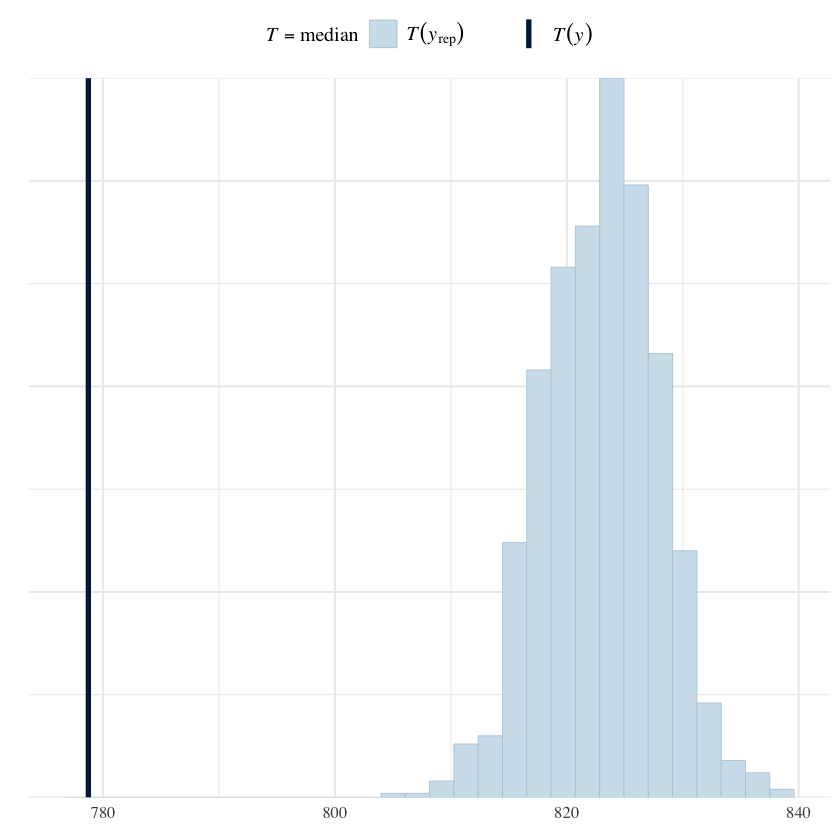

In [3]:
fit_b_sn <- brm(vxC ~ 1+bandInt+ (1+bandInt | id), # 2.1 sec execution time with 4 cores
  data = test,
  family = skew_normal(),
  prior = c(
    prior(normal(600, 200), class = Intercept),
    prior(normal(300, 10), class = sigma),
    prior(normal(4,2),class=alpha)
  )
)
fit_b_sn


plot(fit_b_sn)

pp_check(fit_b_sn, ndraws = 100, type = "dens_overlay")
pp_check(fit_b_sn, type = "stat", stat = "min")
pp_check(fit_b_sn, ndraws = 1000, type = "stat", stat = "mean")
pp_check(fit_b_sn, ndraws = 1000, type = "stat", stat = "median")

In [ ]:
fit_prior_lnorm <- brm(vxn ~ 1, 
  data = test,
  family = lognormal(),
  prior = c(
    prior(normal(8, 10), class = Intercept),
    prior(normal(0, 10), class = sigma)
  ),
  sample_prior = "only",
  control = list(adapt_delta = .9)
)
fit_prior_lnorm

pp_check(fit_prior_lnorm, type = "stat", stat = "mean", 
         prefix = "ppd")+ coord_cartesian(xlim = c(0.0001, 3000000)) +
  scale_x_continuous("vx",
    trans = "log",
    breaks = c(0.001, 1, 100, 1000, 10000, 100000,10000000),
    labels = c(
      "0.001", "1", "100", "1000", "10000",
      "100000","10000000"
    )
  ) +
  ggtitle("Prior predictive distribution of means")



pp_check(fit_prior_lnorm, type = "stat", stat = "mean", prefix = "ppd") +
  coord_cartesian(xlim = c(0.0001, 30000000)) +
  scale_x_continuous("Finger tapping times [ms]",
    trans = "log",
    breaks = c(0.001, 1, 100, 1000, 10000, 100000),
    labels = c(
      "0.001", "1", "100", "1000", "10000",
      "100000"
    )
  ) 


fit_int_ln <- brm(vxn ~ 1,
  data = test,
  family = lognormal(),
  prior = c(
    prior(normal(2, 2), class = Intercept),
    prior(normal(.5, 1), class = sigma)
  )
)

fit_int_ln

estimate_vx <- exp(as_draws_df(fit_int_ln)$b_Intercept)*max(test$vx)
c(mean = mean(estimate_vx), quantile(estimate_vx, probs = c(.025, .975)))

pp_check(fit_int_ln, ndraws = 100)
pp_check(fit_int_ln, type = "stat", stat = "min")
pp_check(fit_int_ln, ndraws = 1000, type = "stat", stat = "mean")
pp_check(fit_int_ln, ndraws = 1000, type = "stat", stat = "median")


In [ ]:
fit_band_ln <- brm(vxn ~ 1 + bandIntn,
  data = test,
  family = lognormal(),
  prior = c(
    prior(normal(2, 2), class = Intercept),
    prior(normal(.5, 1), class = sigma),
    prior(normal(0, 2), class = b, coef = bandIntn)
  ),
  iter = 3000,
  control = list(adapt_delta = .99,
                 max_treedepth = 15)
)

fit_band_ln

estimate_vx <- exp(as_draws_df(fit_band_ln)$b_Intercept)*max(test$vx)
c(mean = mean(estimate_vx), quantile(estimate_vx, probs = c(.025, .975)))

pp_check(fit_band_ln, ndraws = 100)
pp_check(fit_band_ln, type = "stat", stat = "min")
pp_check(fit_band_ln, ndraws = 1000, type = "stat", stat = "mean")
pp_check(fit_band_ln, ndraws = 1000, type = "stat", stat = "median")

In [ ]:
fit_band_ln2 <- brm(vxn ~ 1 + bandIntn + (1+bandIntn | id),
  data = test,
  family = lognormal(),
  prior = c(
    prior(normal(2, 2), class = Intercept),
    prior(normal(.5, 1), class = sigma),
    prior(normal(0, 2), class = b, coef = bandIntn)
  ),
  iter = 3000,
  control = list(adapt_delta = .99,
                 max_treedepth = 15)
)

fit_band_ln2

estimate_vx <- exp(as_draws_df(fit_band_ln2)$b_Intercept)*max(test$vx)
c(mean = mean(estimate_vx), quantile(estimate_vx, probs = c(.025, .975)))

pp_check(fit_band_ln2, ndraws = 100)
pp_check(fit_band_ln2, type = "stat", stat = "min")
pp_check(fit_band_ln2, ndraws = 1000, type = "stat", stat = "mean")
pp_check(fit_band_ln2, ndraws = 1000, type = "stat", stat = "median")


 Family: lognormal 
  Links: mu = identity; sigma = identity 
Formula: vxn ~ 1 + bandIntn + (1 + bandIntn | id) 
   Data: test (Number of observations: 10109) 
  Draws: 4 chains, each with iter = 3000; warmup = 1500; thin = 1;
         total post-warmup draws = 6000

Group-Level Effects: 
~id (Number of levels: 166) 
                        Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)               0.58      0.03     0.52     0.65 1.01      406      784
sd(bandIntn)                1.71      0.10     1.53     1.93 1.01      482     1220
cor(Intercept,bandIntn)    -0.93      0.01    -0.95    -0.91 1.00      829     1855

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -1.89      0.04    -1.97    -1.80 1.02      257      562
bandIntn      2.61      0.13     2.35     2.87 1.02      291      625

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.37      0.00     0.36     0.37 1.00    10188     4422

Draws were sampled using sample(hmc). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).


coef(fit_band_ln2)$id %>% as_tibble(rownames="id") %>% select(id, starts_with("Est")) |> print(n=15)
# A tibble: 166 × 5
   id    Estimate.Intercept Est.Error.Intercept Estimate.bandIntn Est.Error.bandIntn
   <chr>              <dbl>               <dbl>             <dbl>              <dbl>
 1 1                 -1.70               0.0826             2.34               0.378
 2 2                 -0.980              0.0858             0.635              0.409
 3 3                 -2.23               0.0850             4.04               0.396
 4 4                 -1.03               0.0816            -0.412              0.374
 5 5                 -2.36               0.0840             4.12               0.383
 6 6                 -1.67               0.0816             2.00               0.366
 7 7                 -2.04               0.0838             2.64               0.381
 8 8                 -2.83               0.0829             4.45               0.384
 9 9                 -2.21               0.0840             3.97               0.382
10 10                -2.49               0.0849             4.39               0.396
11 11                -2.88               0.0828             5.15               0.376
12 12                -3.65               0.0833             7.32               0.381
13 13                -1.97               0.0837             2.46               0.380
14 14                -2.42               0.0827             4.28               0.380
15 15                -1.83               0.0838             2.45               0.382


cbind(test[,c("id","condit","trial","bandInt","vx","vxn")], fitted(fit_band_ln2)[,-2]) %>% as_tibble()
# A tibble: 10,109 × 9
   id    condit trial bandInt    vx   vxn Estimate  Q2.5 Q97.5
   <fct> <fct>  <dbl>   <dbl> <dbl> <dbl>    <dbl> <dbl> <dbl>
 1 1     Varied   118    1000  682. 0.227    0.425 0.368 0.488
 2 1     Varied   119    1000  943. 0.314    0.425 0.368 0.488
 3 1     Varied   120     800  951. 0.317    0.363 0.325 0.404
 4 1     Varied   121    1000 1431. 0.477    0.425 0.368 0.488
 5 1     Varied   122    1200 1676. 0.558    0.498 0.412 0.593
 6 1     Varied   123    1200 1373. 0.457    0.498 0.412 0.593
 7 1     Varied   124     800  641. 0.214    0.363 0.325 0.404
 8 1     Varied   125     800 1117. 0.372    0.363 0.325 0.404
 9 1     Varied   126    1200 1201. 0.400    0.498 0.412 0.593
10 1     Varied   127    1200 1041. 0.347    0.498 0.412 0.593


In [ ]:
fit_band_ln3 <- brm(vxbn ~ 1 + bandIntn + (1+bandIntnb | id),
  data = test,
  family = lognormal(),
  prior = c(
    prior(normal(0, 3), class = Intercept),
    prior(normal(.5, 2), class = sigma),
    prior(normal(0, 3), class = b, coef = bandIntn)
  ),
  iter = 1000,
  control = list(adapt_delta = .98,
                 max_treedepth = 15)
)

fit_band_ln3

estimate_vx <- exp(as_draws_df(fit_band_ln3)$b_Intercept)*max(test$vx)
c(mean = mean(estimate_vx), quantile(estimate_vx, probs = c(.025, .975)))

pp_check(fit_band_ln3, ndraws = 100)
pp_check(fit_band_ln3, type = "stat", stat = "min")
pp_check(fit_band_ln3, ndraws = 1000, type = "stat", stat = "mean")
pp_check(fit_band_ln3, ndraws = 1000, type = "stat", stat = "median")


Family: lognormal 
  Links: mu = identity; sigma = identity 
Formula: vxbn ~ 1 + bandIntn + (1 + bandIntnb | id) 
   Data: test (Number of observations: 10109) 
  Draws: 4 chains, each with iter = 1000; warmup = 500; thin = 1;
         total post-warmup draws = 2000

Group-Level Effects: 
~id (Number of levels: 166) 
                         Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)                0.58      0.03     0.52     0.65 1.04       89      271
sd(bandIntnb)                0.90      0.05     0.80     1.01 1.04      109      406
cor(Intercept,bandIntnb)    -0.95      0.01    -0.96    -0.93 1.02      221      496

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -1.25      0.04    -1.34    -1.16 1.04       65      113
bandIntn      2.53      0.13     2.27     2.79 1.03       66      123

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.36      0.00     0.36     0.37 1.00     3210     1697




cbind(test[,c("id","condit","gt.bandStage","bandInt","vx","vxbn")] %>% group_by(id,bandInt) %>% mutate(avg_vxbn=mean(vxbn)), fitted(fit_band_ln3)[,-2]) %>% as_tibble()  %>% arrange(id,gt.bandStage,bandInt) |> mutate(trialError=abs(vxbn-Estimate), un=trialError*max(test$vxb))
# A tibble: 10,109 × 12
   id    condit gt.bandStage bandInt    vx  vxbn avg_vxbn Estimate  Q2.5 Q97.5 trialError    un
   <fct> <fct>         <int>   <dbl> <dbl> <dbl>    <dbl>    <dbl> <dbl> <dbl>      <dbl> <dbl>
 1 1     Varied            1     100  663. 0.406    0.352    0.395 0.341 0.457     0.0111  17.7
 2 1     Varied            1     350  628. 0.406    0.494    0.476 0.428 0.528     0.0701 112. 
 3 1     Varied            1     600  846. 0.531    0.608    0.575 0.525 0.627     0.0435  69.6
 4 1     Varied            1     800  951. 0.594    0.661    0.668 0.604 0.744     0.0747 119. 
 5 1     Varied            1    1000  682. 0.438    0.682    0.778 0.675 0.888     0.340  544. 
 6 1     Varied            1    1200 1676. 1        0.833    0.906 0.755 1.07      0.0943 151. 
 7 1     Varied            2     100  580. 0.375    0.352    0.395 0.341 0.457     0.0202  32.3
 8 1     Varied            2     350  659. 0.406    0.494    0.476 0.428 0.528     0.0701 112. 
 9 1     Varied            2     600 1462. 0.906    0.608    0.575 0.525 0.627     0.331  530. 
10 1     Varied            2     800  641. 0.406    0.661    0.668 0.604 0.744     0.262  419. 


In [ ]:
fit_band_sln <- brm(vxn ~ 1 + bandIntn + (1+bandIntn | id),
  data = test,
  family = shifted_lognormal(),
  prior = c(
    prior(normal(2, 2), class = Intercept),
    prior(normal(.5, 1), class = sigma),
    prior(normal(0, 2), class = b, coef = bandIntn),
    prior(normal(0.0, 0.10), class = ndt)
  ),
  iter = 2000,
  control = list(adapt_delta = .99,
                 max_treedepth = 15)
)

fit_band_sln

estimate_vx <- exp(as_draws_df(fit_band_sln)$b_Intercept)*max(test$vx)
c(mean = mean(estimate_vx), quantile(estimate_vx, probs = c(.025, .975)))

pp_check(fit_band_sln, ndraws = 100)
pp_check(fit_band_sln, type = "stat", stat = "min")
pp_check(fit_band_sln, ndraws = 1000, type = "stat", stat = "mean")
pp_check(fit_band_sln, ndraws = 1000, type = "stat", stat = "median")


In [ ]:
fit_band_sln <- brm(vxn ~ 1 + bandIntn + (1+bandIntn | id),
  data = test,
  family = shifted_lognormal(),
  prior = c(
    prior(normal(0, 3), class = Intercept),
    prior(normal(.5, 1), class = sigma),
    prior(normal(1, 2), class = b, coef = bandIntn),
    prior(normal(0.0, 2), class = ndt)
  ),
  file=cache/band_sln_vxn,
  iter = 1000,
  control = list(adapt_delta = .99,
                 max_treedepth = 15)
)

fit_band_sln

estimate_vx <- exp(as_draws_df(fit_band_sln)$b_Intercept)*max(test$vx)
c(mean = mean(estimate_vx), quantile(estimate_vx, probs = c(.025, .975)))

pp_check(fit_band_sln, ndraws = 100)
pp_check(fit_band_sln, type = "stat", stat = "min")
pp_check(fit_band_sln, ndraws = 1000, type = "stat", stat = "mean")
pp_check(fit_band_sln, ndraws = 1000, type = "stat", stat = "median")


 Family: shifted_lognormal 
  Links: mu = identity; sigma = identity; ndt = identity 
Formula: vxn ~ 1 + bandIntn + (1 + bandIntn | id) 
   Data: test (Number of observations: 10109) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~id (Number of levels: 166) 
                        Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)               0.58      0.03     0.52     0.65 1.01      219      544
sd(bandIntn)                1.71      0.10     1.51     1.93 1.01      256      589
cor(Intercept,bandIntn)    -0.93      0.01    -0.95    -0.91 1.02      403      729

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -1.90      0.05    -1.98    -1.80 1.03      122      248
bandIntn      2.64      0.14     2.36     2.91 1.03      134      345

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.37      0.00     0.36     0.37 1.00     6477     2838
ndt       0.00      0.00     0.00     0.00 1.00     3818     1880




coef(fit_band_sln)$id %>% as_tibble(rownames="id") %>% select(id, starts_with("Est")) |> print(n=15)
# A tibble: 166 × 5
   id    Estimate.Intercept Est.Error.Intercept Estimate.bandIntn Est.Error.bandIntn
   <chr>              <dbl>               <dbl>             <dbl>              <dbl>
 1 1                 -1.71               0.0811             2.34               0.363
 2 2                 -0.981              0.0862             0.640              0.419
 3 3                 -2.23               0.0847             4.05               0.403
 4 4                 -1.03               0.0805            -0.415              0.368
 5 5                 -2.36               0.0806             4.13               0.367
 6 6                 -1.67               0.0831             2.00               0.386
 7 7                 -2.04               0.0830             2.63               0.379
 8 8                 -2.83               0.0863             4.45               0.392
 9 9                 -2.21               0.0831             3.96               0.383
10 10                -2.49               0.0839             4.39               0.402
11 11                -2.88               0.0876             5.15               0.385
12 12                -3.65               0.0873             7.33               0.390
13 13                -1.98               0.0820             2.48               0.371
14 14                -2.42               0.0831             4.27               0.375
15 15                -1.83               0.0813             2.46               0.378

bind(test[,c("id","condit","trial","bandInt","vx","vxn")], fitted(fit_band_sln)[,-2]) %>% as_tibble()
# A tibble: 10,109 × 9
   id    condit trial bandInt    vx   vxn Estimate  Q2.5 Q97.5
   <fct> <fct>  <dbl>   <dbl> <dbl> <dbl>    <dbl> <dbl> <dbl>
 1 1     Varied   118    1000  682. 0.227    0.425 0.369 0.483
 2 1     Varied   119    1000  943. 0.314    0.425 0.369 0.483
 3 1     Varied   120     800  951. 0.317    0.363 0.326 0.402
 4 1     Varied   121    1000 1431. 0.477    0.425 0.369 0.483
 5 1     Varied   122    1200 1676. 0.558    0.497 0.414 0.586
 6 1     Varied   123    1200 1373. 0.457    0.497 0.414 0.586
 7 1     Varied   124     800  641. 0.214    0.363 0.326 0.402
 8 1     Varied   125     800 1117. 0.372    0.363 0.326 0.402
 9 1     Varied   126    1200 1201. 0.400    0.497 0.414 0.586


In [ ]:
fit_band_sln <- brm(vxn ~ 1 + bandIntn + (1+bandIntn | id),
  data = test,
  family = shifted_lognormal(),
  prior = c(
    prior(normal(0, 3), class = Intercept),
    prior(normal(.5, 1), class = sigma),
    prior(normal(1, 2), class = b, coef = bandIntn),
    prior(normal(0.0, 2), class = ndt)
  ),
  file="cache/band_sln_vxn",
  iter = 1000,
  control = list(adapt_delta = .99,
                 max_treedepth = 15)
)


fit_band_sln <- brm(vxbn ~ 1 + bandIntnb + (1+bandIntnb | id),
  data = test,
  family = shifted_lognormal(),
  prior = c(
    prior(normal(0, 3), class = Intercept),
    prior(normal(.5, 1), class = sigma),
    prior(normal(1, 2), class = b, coef = bandIntnb),
    prior(normal(0.0, 2), class = ndt)
  ),
  file="cache/band_sln_vxbn",
  iter = 1000,
  control = list(adapt_delta = .99,
                 max_treedepth = 15)
)




fit_band_ln <- brm(vxn ~ 1 + bandIntn + (1+bandIntn | id),
  data = test,
  family = lognormal(),
  prior = c(
    prior(normal(0, 3), class = Intercept),
    prior(normal(.5, 1), class = sigma),
    prior(normal(1, 2), class = b, coef = bandIntn)
  ),
  file="cache/band_ln_vxn",
  iter = 1000,
  control = list(adapt_delta = .99,
                 max_treedepth = 15)
)


fit_band_ln <- brm(vxbn ~ 1 + bandIntnb + (1+bandIntnb | id),
  data = test,
  family = lognormal(),
  prior = c(
    prior(normal(0, 3), class = Intercept),
    prior(normal(.5, 1), class = sigma),
    prior(normal(1, 2), class = b, coef = bandIntnb)
  ),
  file="cache/band_ln_vxbn",
  iter = 1000,
  control = list(adapt_delta = .99,
                 max_treedepth = 15)
)



fit_band_ln_x <- brm(vx ~ 1 + bandInt + (1+bandInt | id),
  data = test,
  family = lognormal(),
  prior = c(
    prior(normal(0, 3), class = Intercept),
    prior(normal(.5, 1), class = sigma),
    prior(normal(1, 2), class = b, coef = bandInt)
  ),
  file="cache/band_ln_vx",
  iter = 1000
)



fit_b_sn <- brm(vxC ~ 1+bandInt+ (1+bandInt | id), # 2.1 sec execution time with 4 cores
  data = test,
  family = skew_normal(),
  prior = c(
    prior(normal(600, 200), class = Intercept),
    prior(normal(300, 10), class = sigma),
    prior(normal(4,2),class=alpha)
  ),
  file="cache/band_sn_vxC",
)

fit_b_sn <- brm(vxb ~ 1+bandInt+ (1+bandInt | id), # 2.1 sec execution time with 4 cores
  data = test,
  family = skew_normal(),
  prior = c(
    prior(normal(600, 200), class = Intercept),
    prior(normal(300, 10), class = sigma),
    prior(normal(4,2),class=alpha)
  ),
  file="cache/band_sn_vxb",
)


fit_b_sn <- brm(vx ~ 1+bandInt+ (1+bandInt | id), # 2.1 sec execution time with 4 cores
  data = test,
  family = skew_normal(),
  prior = c(
    prior(normal(600, 200), class = Intercept),
    prior(normal(300, 10), class = sigma),
    prior(normal(4,2),class=alpha)
  ),
  file="cache/band_sn_vx",
)



#################






fit_band_sln <- brm(vxn ~ 1 + bandIntn + (1+bandIntn | id),
  data = test2,
  family = shifted_lognormal(),
  prior = c(
    prior(normal(0, 3), class = Intercept),
    prior(normal(.5, 1), class = sigma),
    prior(normal(1, 2), class = b, coef = bandIntn),
    prior(normal(0.0, 2), class = ndt)
  ),
  file="cache/test2_band_sln_vxn",
  iter = 1000,
  control = list(adapt_delta = .99,
                 max_treedepth = 15)
)


fit_band_sln <- brm(vxbn ~ 1 + bandIntnb + (1+bandIntnb | id),
  data = test2,
  family = shifted_lognormal(),
  prior = c(
    prior(normal(0, 3), class = Intercept),
    prior(normal(.5, 1), class = sigma),
    prior(normal(1, 2), class = b, coef = bandIntnb),
    prior(normal(0.0, 2), class = ndt)
  ),
  file="cache/test2_band_sln_vxbn",
  iter = 1000,
  control = list(adapt_delta = .99,
                 max_treedepth = 15)
)




fit_band_ln <- brm(vxn ~ 1 + bandIntn + (1+bandIntn | id),
  data = test2,
  family = lognormal(),
  prior = c(
    prior(normal(0, 3), class = Intercept),
    prior(normal(.5, 1), class = sigma),
    prior(normal(1, 2), class = b, coef = bandIntn)
  ),
  file="cache/test2_band_ln_vxn",
  iter = 1000,
  control = list(adapt_delta = .99,
                 max_treedepth = 15)
)


fit_band_ln <- brm(vxbn ~ 1 + bandIntnb + (1+bandIntnb | id),
  data = test2,
  family = lognormal(),
  prior = c(
    prior(normal(0, 3), class = Intercept),
    prior(normal(.5, 1), class = sigma),
    prior(normal(1, 2), class = b, coef = bandIntnb)
  ),
  file="cache/test2_band_ln_vxbn",
  iter = 1000,
  control = list(adapt_delta = .99,
                 max_treedepth = 15)
)



fit_band_ln_x <- brm(vx ~ 1 + bandInt + (1+bandInt | id),
  data = test2,
  family = lognormal(),
  prior = c(
    prior(normal(0, 3), class = Intercept),
    prior(normal(.5, 1), class = sigma),
    prior(normal(1, 2), class = b, coef = bandInt)
  ),
  file="cache/test2_band_ln_vx",
  iter = 1000,
  control = list(adapt_delta = .99,
                 max_treedepth = 15)
)



fit_b_sn <- brm(vxC ~ 1+bandInt+ (1+bandInt | id), # 2.1 sec execution time with 4 cores
  data = test2,
  family = skew_normal(),
  prior = c(
    prior(normal(600, 200), class = Intercept),
    prior(normal(300, 10), class = sigma),
    prior(normal(4,2),class=alpha)
  ),
  file="cache/test2_band_sn_vxC",
)

fit_b_sn <- brm(vxb ~ 1+bandInt+ (1+bandInt | id), # 2.1 sec execution time with 4 cores
  data = test2,
  family = skew_normal(),
  prior = c(
    prior(normal(600, 200), class = Intercept),
    prior(normal(300, 10), class = sigma),
    prior(normal(4,2),class=alpha)
  ),
  file="cache/test2_band_sn_vxb",
)


fit_b_sn <- brm(vx ~ 1+bandInt+ (1+bandInt | id), # 2.1 sec execution time with 4 cores
  data = test2,
  family = skew_normal(),
  prior = c(
    prior(normal(600, 200), class = Intercept),
    prior(normal(300, 10), class = sigma),
    prior(normal(4,2),class=alpha)
  ),
  file="cache/test2_band_sn_vx",
)


In [ ]:
fit_band_sln <- brm(vxn ~ 1 + bandIntn + (1+bandIntn | id),
  data = test,
  family = shifted_lognormal(),
  prior = c(
    prior(normal(0, 3), class = Intercept),
    prior(normal(.5, 1), class = sigma),
    prior(normal(1, 2), class = b, coef = bandIntn),
    prior(normal(0.0, 2), class = ndt)
  ),
  file=cache/band_sln_vxn,
  iter = 1000,
  control = list(adapt_delta = .99,
                 max_treedepth = 15)
)

In [ ]:
mu <- 6
sigma <- .4
N <- 50000
# Generate N random samples from a log-normal distribution
sl <- rlnorm(N, mu, sigma)
ggplot(tibble(samples = sl), aes(samples)) +
  geom_histogram(aes(y = after_stat(density)), binwidth = 50) +
  ggtitle("Log-normal distribution\n") +
  coord_cartesian(xlim = c(0, 2000))
# Generate N random samples from a normal distribution,
# and then exponentiate them
sn <- exp(rnorm(N, mu, sigma))
ggplot(tibble(samples = sn), aes(samples)) +
  geom_histogram(aes(y = after_stat(density)), binwidth = 50) +
  ggtitle("Exponentiated samples from\na normal distribution") +
  coord_cartesian(xlim = c(0, 2000))



#https://github.com/vasishth/bayescogsci/blob/master/LOT2020WinterSchoolSlides/03-compbayes-slides.Rmd
N_samples <- 1000
N_obs <- nrow(test)/5
mu_samples <- runif(N_samples, 0, 11)
sigma_samples <- runif(N_samples, 0, 1)
prior_pred_ln <- normal_predictive_distribution(
  mu_samples = mu_samples,
  sigma_samples = sigma_samples,
  N_obs = N_obs
) %>%
  mutate(t_pred = exp(t_pred))

prior_pred_ln %>% group_by(iter) %>% summarise(mean_t=mean(t_pred),min_t=min(t_pred),max_t=max(t_pred)) %>%
  ggplot()+geom_histogram(aes(x=min_t,y = after_stat(density)), binwidth = 60) +
  coord_cartesian(xlim = c(0, 2000))



(prior_pred_stat_ln <- 
prior_pred_ln %>%
  group_by(iter) %>%
  summarize(
    min_rt = min(t_pred),
    max_rt = max(t_pred),
    average_rt = mean(t_pred),
    median_rt = median(t_pred)
  ) %>%
  pivot_longer(cols = ends_with("rt"), names_to = "stat", values_to = "rt"))


prior_pred_stat_ln %>%
  ggplot(aes(rt)) +
  scale_x_continuous("Reaction times in ms",
    trans = "log", breaks = c(0.001, 1, 100, 1000, 10000, 100000)
  ) +
  geom_histogram() +
  facet_wrap(~stat, ncol = 1)
